In [ ]:
'''
1. データセットの読み込みと前処理
'''
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# データセットの読み込み
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 訓練用とテスト用の画像データを正規化する
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
x_train, x_test = x_train/255.0, x_test/255.0
    
# 訓練データとテストデータの正解ラベルを10クラスのOne-Hot表現に変換
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
'''
2. モデルの定義
'''
# tensorflowのインポート
import tensorflow as tf

class CNN(tf.keras.Model):
    '''畳み込みニューラルネットワーク
    
    Attributes:
      conv2D_1(Conv2D): 畳み込み層
      conv2D_2(Conv2D): 畳み込み層
      pool1(MaxPooling2D): プーリング層
      dropput1(Dropout): ドロップアウト
      conv2D_3(Conv2D): 畳み込み層
      conv2D_4(Conv2D): 畳み込み層
      pool2(MaxPooling2D): プーリング層
      dropput2(Dropout): ドロップアウト
      flatten(Flatten): フラット化
      fc1(Dense): 全結合層
      dropput3(Dropout): ドロップアウト
      fc2(Dense): 全結合層
    '''
    def __init__(self):
        '''モデルの初期化を行う
        '''
        super().__init__()
        # 畳み込み層1：活性化関数はReLU
        # (バッチサイズ, 32, 32, 3) -> (バッチサイズ, 32, 32, 32)
        self.conv2D_1 = tf.keras.layers.Conv2D(
            filters=32,               # フィルターの数は32
            kernel_size=(3, 3),       # 3×3のフィルターを使用
            padding='same',           # ゼロパディングを行う
            input_shape=(28, 28, 1),  # 入力データの形状                     
            activation='relu'         # 活性化関数はReLU
            )

        # 畳み込み層2：活性化関数はReLU
        # (バッチサイズ, 32, 32, 32) -> (バッチサイズ, 32, 32, 32)
        self.conv2D_2 = tf.keras.layers.Conv2D(
            filters=32,               # フィルターの数は32
            kernel_size=(3, 3),       # 3×3のフィルターを使用
            padding='same',           # ゼロパディングを行う
            activation='relu'         # 活性化関数はReLU
            )
        # プーリング層1
        # (バッチサイズ, 32, 32, 32) -> (バッチサイズ, 16, 16, 32)
        self.pool1 = tf.keras.layers.MaxPooling2D(
            pool_size=(2,2) # 縮小対象の領域は2x2
        )
        # ドロップアウト1
        self.dropput1 = tf.keras.layers.Dropout(0.5)

        # 畳み込み層3：活性化関数はReLU
        # (バッチサイズ, 16, 16, 32) -> (バッチサイズ, 16, 16, 64)
        self.conv2D_3 = tf.keras.layers.Conv2D(
            filters=64,               # フィルターの数は64
            kernel_size=(3, 3),       # 3×3のフィルターを使用
            padding='same',           # ゼロパディングを行う
            activation='relu'         # 活性化関数はReLU
            )
        # 畳み込み層4：活性化関数はReLU
        # (バッチサイズ, 16, 16, 64) -> (バッチサイズ, 16, 16, 64)
        self.conv2D_4 = tf.keras.layers.Conv2D(
            filters=64,               # フィルターの数は64
            kernel_size=(3, 3),       # 3×3のフィルターを使用
            padding='same',           # ゼロパディングを行う
            activation='relu'         # 活性化関数はReLU
            )
        # プーリング層2
        # (バッチサイズ, 16, 16, 64) -> (バッチサイズ, 8, 8, 64)
        self.pool2 = tf.keras.layers.MaxPooling2D(
            pool_size=(2,2) # 縮小対象の領域は2x2
        )
        # ドロップアウト2
        self.dropput2 = tf.keras.layers.Dropout(0.5)

        # Flatten
        # (バッチサイズ, 8, 8, 64) -> (バッチサイズ, 4096)
        self.flatten = tf.keras.layers.Flatten()
        # 全結合層1：活性化関数はReLU
        # (バッチサイズ, 4096) -> (バッチサイズ, 512)
        self.fc1 = tf.keras.layers.Dense(512, activation='relu')
        # ドロップアウト3
        self.dropput3 = tf.keras.layers.Dropout(0.5)

        # 全結合層2：活性化関数はソフトマックス
        # (バッチサイズ, 512) -> (バッチサイズ, 10)
        self.fc2 = tf.keras.layers.Dense(10, activation='softmax')

    @tf.function
    def call(self, x, training=None):
        '''MLPのインスタンスからコールバックされる関数
        
        Parameters: x(ndarray(float32)):訓練データ、または検証データ
        Returns(float32): CNNの出力
        '''
        x = self.conv2D_1(x) # 畳み込み層1
        x = self.pool1(self.conv2D_2(x)) # 畳み込み層2 ->プーリング1
        # 訓練時のみドロップアウトを適用
        if training:
            x = self.dropput1(x)

        x = self.conv2D_3(x) # 畳み込み層3
        x = self.pool2(self.conv2D_4(x)) # 畳み込み層4 -> プーリング2
        # 訓練時のみドロップアウトを適用
        if training:
            x = self.dropput2(x)

        x = self.flatten(x) # (8, 8, 64)の出力を(4096,)にフラット化
        x = self.fc1(x) # 全結合層1
        # 訓練時のみドロップアウトを適用
        if training:
            x = self.dropput3(x)

        x = self.fc2(x) # 全結合層2
        return x

In [ ]:
'''
3. 損失関数とオプティマイザーの生成
'''
import tensorflow as tf

# マルチクラス分類のクロスエントロピー誤差を求めるオブジェクト
loss_fn = tf.keras.losses.CategoricalCrossentropy()
# 勾配降下アルゴリズムを使用するオプティマイザーを生成
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
'''
4. 勾配降下アルゴリズムによるパラメーターの更新処理
'''
# 損失を記録するオブジェクトを生成
train_loss = tf.keras.metrics.Mean()
# カテゴリカルデータの精度を記録するオブジェクトを生成
train_accuracy = tf.keras.metrics.CategoricalAccuracy()

@tf.function
def train_step(x, t):
    '''学習を1回行う
    
    Parameters: x(ndarray(float32)):訓練データ
                t(ndarray(float32)):正解ラベル
                
    Returns:
      ステップごとのクロスエントロピー誤差
    '''
    # 自動微分による勾配計算を記録するブロック
    with tf.GradientTape() as tape:
        # 訓練モードをTrueに指定し、
        # モデルに入力して順伝搬の出力値を取得
        outputs = model(x, training=True)
        # 出力値と正解ラベルの誤差
        tmp_loss = loss_fn(t, outputs)
        
    # tapeに記録された操作を使用して誤差の勾配を計算        
    grads = tape.gradient(
        # 現在のステップの誤差
        tmp_loss,
        # バイアス、重みのリストを取得
        model.trainable_variables)
    # 勾配降下法の更新式を適用してバイアス、重みを更新
    optimizer.apply_gradients(zip(grads,
                                  model.trainable_variables))
    
    # 損失をMeanオブジェクトに記録
    train_loss(tmp_loss)
    # 精度をCategoricalAccuracyオブジェクトに記録
    train_accuracy(t, outputs)

In [ ]:
'''
5. モデルの検証を行う
'''
# 損失を記録するオブジェクトを生成
val_loss = tf.keras.metrics.Mean()
# カテゴリカルデータの精度を記録するオブジェクトを生成
val_accuracy = tf.keras.metrics.CategoricalAccuracy()

@tf.function
def valid_step(val_x, val_y):
    # 訓練モードをTrueに指定し、
    # モデルに入力して順伝搬の出力値を取得
    pred = model(val_x, training = False)
    # 出力値と正解ラベルの誤差
    tmp_loss = loss_fn(val_y, pred)
    # 損失をMeanオブジェクトに記録
    val_loss(tmp_loss)
    # 精度をCategoricalAccuracyオブジェクトに記録
    val_accuracy(val_y, pred)

In [ ]:
'''
6. 学習の進捗を監視し早期終了判定を行うクラス
'''
class EarlyStopping:
    def __init__(self, patience=10, verbose=0):
        '''
        Parameters:
            patience(int): 監視するエポック数(デフォルトは10)
            verbose(int): 早期終了の出力フラグ
                          出力(1),出力しない(0)        
        '''
        # インスタンス変数の初期化
        # 監視中のエポック数のカウンターを初期化
        self.epoch = 0
        # 比較対象の損失を無限大'inf'で初期化
        self.pre_loss = float('inf')
        # 監視対象のエポック数をパラメーターで初期化
        self.patience = patience
        # 早期終了メッセージの出力フラグをパラメーターで初期化
        self.verbose = verbose
        
    def __call__(self, current_loss):
        '''
        Parameters:
            current_loss(float): 1エポック終了後の検証データの損失
        Return:
            True:監視回数の上限までに前エポックの損失を超えた場合
            False:監視回数の上限までに前エポックの損失を超えない場合
        '''
        # 前エポックの損失より大きくなった場合
        if self.pre_loss < current_loss:
            # カウンターを1増やす
            self.epoch += 1
            # 監視回数の上限を超えた場合
            if self.epoch > self.patience:
                # 早期終了のフラグが1の場合
                if self.verbose:
                    # メッセージを出力
                    print('early stopping')
                # 学習を終了するTrueを返す
                return True
        # 前エポックの損失より小さくならなかった場合
        else:
            # カウンターを0に戻す
            self.epoch = 0
            # 損失の値を更新する
            self.pre_loss = current_loss
        
        # 監視回数の上限を超えた直後に損失が改善されなければ
        # Falseを返して学習を続行する
        # 前エポックの損失を上回るが監視回数の範囲内であれば
        # Falseを返す必要があるので、return文の位置はここであることに注意
        return False

In [ ]:
'''
7. 訓練データと検証データの用意
'''
from sklearn.model_selection import train_test_split

# 訓練データと検証データに8：2の割合で分割  \は行継続文字
tr_x, val_x, tr_y, val_y = \
    train_test_split(x_train, y_train, test_size=0.2)

In [ ]:
%%time
'''
8.モデルを生成して学習する
'''
from sklearn.utils import shuffle

# エポック数
epochs = 200
# ミニバッチのサイズ
batch_size = 64
# 訓練データのステップ数
tr_steps = tr_x.shape[0] // batch_size
# 検証データのステップ数
val_steps = val_x.shape[0] // batch_size

# CNNのモデルを生成
model = CNN()
# 損失と精度の履歴を保存するためのdictオブジェクト
history = {'loss':[],'accuracy':[], 'val_loss':[], 'val_accuracy':[]}

# 早期終了の判定を行うオブジェクトを生成
ers = EarlyStopping(patience=20, # 監視対象回数
                    verbose=1)  # 早期終了時にメッセージを出力

# 学習を行う
for epoch in range(epochs):

    # 学習するたびに、記録された値をリセット
    train_loss.reset_states()     # 訓練時における損失の累計
    train_accuracy.reset_states() # 訓練時における精度の累計
    val_loss.reset_states()       # 検証時における損失の累計
    val_accuracy.reset_states()   # 検証時における精度の累計

    # 訓練データと正解ラベルをシャッフル
    x_, y_ = shuffle(tr_x, tr_y, )
    
    # 1ステップにおける訓練用ミニバッチを使用した学習
    for step in range(tr_steps):
        start = step * batch_size # ミニバッチの先頭インデックス
        end = start + batch_size  # ミニバッチの末尾のインデックス
        # ミニバッチでバイアス、重みを更新して誤差を取得
        train_step(x_[start:end], y_[start:end])

    # 1ステップにおける検証用ミニバッチを使用した評価
    for step in range(val_steps):
        start = step * batch_size # ミニバッチの先頭インデックス
        end = start + batch_size  # ミニバッチの末尾のインデックス
        # ミニバッチでバイアス、重みを更新して誤差を取得
        valid_step(val_x[start:end], val_y[start:end])

    avg_train_loss = train_loss.result()    # 訓練時の平均損失値を取得
    avg_train_acc = train_accuracy.result() # 訓練時の平均正解率を取得
    avg_val_loss = val_loss.result()     # 検証時の平均損失値を取得
    avg_val_acc = val_accuracy.result()  # 検証時の平均正解率を取得

    # 損失の履歴を保存する
    history['loss'].append(avg_train_loss)
    history['val_loss'].append(avg_val_loss)
    # 精度の履歴を保存する
    history['accuracy'].append(avg_train_acc)
    history['val_accuracy'].append(avg_val_acc)

    # 1エポックごとに結果を出力
    if (epoch + 1) % 1 == 0:
        print(
            'epoch({}) train_loss: {:.4} train_acc: {:.4} val_loss: {:.4} val_acc: {:.4}'.format(
                epoch+1,
                avg_train_loss, # 現在の損失を出力
                avg_train_acc,  # 現在の精度を出力
                avg_val_loss,   # 現在の損失を出力
                avg_val_acc     # 現在の精度を出力
    ))
    
    # 検証データの損失をEarlyStoppingオブジェクトに渡して早期終了を判定
    if ers(val_loss.result()):
        # 監視対象のエポックで損失が改善されなければ学習を終了
        break

# モデルの概要を出力
model.summary()

epoch(1) train_loss: 1.664 train_acc: 0.3885 val_loss: 1.289 val_acc: 0.5273
epoch(2) train_loss: 1.279 train_acc: 0.5383 val_loss: 1.078 val_acc: 0.6142
epoch(3) train_loss: 1.12 train_acc: 0.5998 val_loss: 0.9965 val_acc: 0.6439
epoch(4) train_loss: 1.023 train_acc: 0.6364 val_loss: 0.9446 val_acc: 0.6694
epoch(5) train_loss: 0.9552 train_acc: 0.6621 val_loss: 0.8205 val_acc: 0.709
epoch(6) train_loss: 0.9071 train_acc: 0.6793 val_loss: 0.8048 val_acc: 0.7154
epoch(7) train_loss: 0.8636 train_acc: 0.6939 val_loss: 0.7807 val_acc: 0.7251
epoch(8) train_loss: 0.8282 train_acc: 0.7071 val_loss: 0.7607 val_acc: 0.7304
epoch(9) train_loss: 0.802 train_acc: 0.7145 val_loss: 0.7492 val_acc: 0.7365
epoch(10) train_loss: 0.783 train_acc: 0.7218 val_loss: 0.7017 val_acc: 0.7547
epoch(11) train_loss: 0.7508 train_acc: 0.7346 val_loss: 0.7063 val_acc: 0.747
epoch(12) train_loss: 0.7404 train_acc: 0.7369 val_loss: 0.6774 val_acc: 0.7584
epoch(13) train_loss: 0.7206 train_acc: 0.7452 val_loss: 0.6

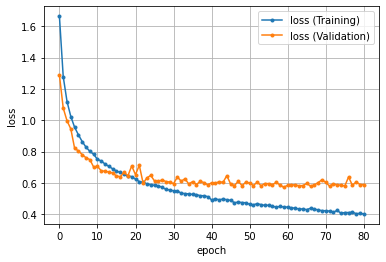

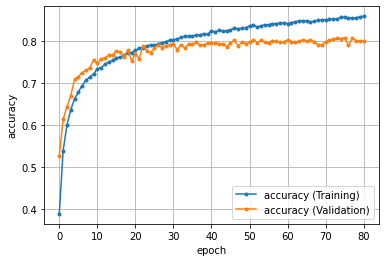

In [ ]:
'''
9. 損失と精度の推移をグラフにする
'''
import matplotlib.pyplot as plt
%matplotlib inline

# 学習結果（損失）のグラフを描画
plt.plot(history['loss'],
         marker='.',
         label='loss (Training)')
plt.plot(history['val_loss'],
         marker='.',
         label='loss (Validation)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 学習結果（精度）のグラフを描画
plt.plot(history['accuracy'],
         marker='.',
         label='accuracy (Training)')
plt.plot(history['val_accuracy'],
         marker='.',
         label='accuracy (Validation)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
'''
10. テストデータによるモデルの評価
'''
# テストデータの予測値を取得
test_preds = model(x_test)
# カテゴリカルデータの精度を取得するオブジェクト
categor_acc = tf.keras.metrics.CategoricalAccuracy()
# 精度を測定するデータを設定
categor_acc.update_state(y_test, test_preds)
# テストデータの精度を取得
test_acc = categor_acc.result().numpy()
# テストデータの損失を取得
test_loss = loss_fn(y_test, test_preds)

print('test_loss: {:.4f}, test_acc: {:.4f}'.format(
    test_loss,
    test_acc
))

test_loss: 0.6161, test_acc: 0.7959
